In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget
%matplotlib inline

In [15]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
filename = wget.download(url)
print(filename)

100% [..........................................................................] 1423529 / 1423529housing.csv


In [235]:
data = pd.read_csv(filename)

In [350]:
df["above_average"] = 1

In [351]:
#df.isna().sum() , replace with 0
df["total_bedrooms"] = df["total_bedrooms"].fillna(0)

### Simple feature engineering and make median_house_value binary


In [352]:
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["population_per_household"] = df["population"] / df["households"]
df.above_average[df["median_house_value"] > df["median_house_value"].mean()] = 1
df.above_average[df["median_house_value"] <= df["median_house_value"].mean()] = 0
df.head()

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_27428/4008400095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.above_average[df["median_house_value"] > df["median_house_value"].mean()] = 1
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_27428/4008400095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.above_average[df["median_house_value"] <= df["median_house_value"].mean()] = 0


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_room,rooms_per_household,population_per_household,above_average
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127,2.555556,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137,2.109842,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136,2.802260,1
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352,2.547945,1
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853,2.181467,1


In [239]:
columns = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity',
"bedrooms_per_room",
"rooms_per_household",
"population_per_household",
"above_average"]

#### What is the most frequent observation (mode) for the column ocean_proximity?

In [240]:
# its <1H OCEAN
df["ocean_proximity"].mode()

0    <1H OCEAN
dtype: object

### Split the data

In [192]:
from sklearn.model_selection import train_test_split

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  20640 non-null  float64
 1   longitude                 20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  bedrooms_per_room         20640 non-null  float64
 11  rooms_per_household       20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  above_average             20640 non-null  int64  
dtypes: flo

In [241]:
# prepare X and y and then split
X_train_full = df.loc[:, ~df.columns.isin(['median_house_value', 'above_average'])]
y_train_full = df.above_average.values

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [245]:
#reset index
# X_train_full = X_train_full.reset_index(drop=True)
# X_train = X_train.reset_index(drop=True)
# X_test = X_test.reset_index(drop=True)
# X_val = X_val.reset_index(drop=True)
X_val.head()


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedrooms_per_room,rooms_per_household,population_per_household
2071,36.74,-119.85,35.0,1191.0,190.0,537.0,182.0,3.5375,INLAND,0.159530,6.543956,2.950549
2612,41.02,-124.16,23.0,1672.0,385.0,1060.0,390.0,2.1726,NEAR OCEAN,0.230263,4.287179,2.717949
10838,33.67,-117.92,14.0,6224.0,1679.0,3148.0,1589.0,4.2071,<1H OCEAN,0.269762,3.916929,1.981120
4061,34.15,-118.45,10.0,1091.0,260.0,517.0,266.0,4.1727,<1H OCEAN,0.238313,4.101504,1.943609
10767,33.63,-117.90,28.0,2370.0,352.0,832.0,347.0,7.1148,<1H OCEAN,0.148523,6.829971,2.397695


In [246]:
len(y_train_full), len(y_train), len(y_test), len(y_val)

(20640, 12384, 4128, 4128)

In [247]:
len(X_train_full), len(X_train), len(X_test), len(X_val)

(20640, 12384, 4128, 4128)

In [272]:
#correlation
df.corrwith(df.above_average).sort_values(ascending=False)
#median_income : 0.688075
#bedrooms_per_room : -0.238759   (inverse correlation)        

above_average               1.000000
median_house_value          0.804353
median_income               0.541778
total_rooms                 0.128782
rooms_per_household         0.112104
housing_median_age          0.080069
households                  0.074778
total_bedrooms              0.056209
population                 -0.014898
population_per_household   -0.023354
longitude                  -0.072633
latitude                   -0.098810
bedrooms_per_room          -0.211781
dtype: float64

In [205]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_room,rooms_per_household,population_per_household,above_average
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127,2.555556,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137,2.109842,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136,2.802260,1
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352,2.547945,1
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853,2.181467,1


#### Calculate the mutual information score with the (binarized) price for the categorical variable ####that we have. Use the training set only.
##### What is the value of mutual information?
##### Round it to 2 decimal digits using round(score, 2)

In [249]:
from sklearn.metrics import mutual_info_score

In [250]:
def mutual_score(series):
    return mutual_info_score(series, df.above_average)

In [251]:
#0.1
round(mutual_score(df.ocean_proximity), 3)

0.102

#### Transform the categorical and numerical columns

In [252]:
from sklearn.feature_extraction import DictVectorizer

In [253]:
dv = DictVectorizer(sparse=False)

In [254]:
X_train_dict = X_train.to_dict(orient='records')
X_val_dict = X_val.to_dict(orient='records')
X_val_dict[0]

{'latitude': 36.74,
 'longitude': -119.85,
 'housing_median_age': 35.0,
 'total_rooms': 1191.0,
 'total_bedrooms': 190.0,
 'population': 537.0,
 'households': 182.0,
 'median_income': 3.5375,
 'ocean_proximity': 'INLAND',
 'bedrooms_per_room': 0.15952980688497062,
 'rooms_per_household': 6.543956043956044,
 'population_per_household': 2.9505494505494507}

In [255]:
X_train_dv = dv.fit_transform(X_train_dict)
X_val_dv = dv.transform(X_val_dict)

In [256]:
len(X_val_dv), len(X_train_dv)

(4128, 12384)

### Lets train the model

In [257]:
from sklearn.linear_model import LogisticRegression

In [258]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [259]:
model.fit(X_train_dv, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [260]:
model.intercept_[0]

-0.06226206219069978

In [262]:
model.coef_[0].round(3)

array([ 0.113,  0.004,  0.036,  0.103,  0.083,  1.196,  0.452, -1.599,
        0.012,  0.309,  0.763, -0.002,  0.01 , -0.014,  0.002, -0.   ])

##### let find the predictions probability

In [263]:
y_pred = model.predict_proba(X_val_dv)[:, 1]
y_pred

array([0.08754291, 0.15993596, 0.95208568, ..., 0.95879498, 0.84936804,
       0.47231751])

In [267]:
from sklearn.metrics import roc_auc_score

In [266]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'bedrooms_per_room': 0.113,
 'households': 0.004,
 'housing_median_age': 0.036,
 'latitude': 0.103,
 'longitude': 0.083,
 'median_income': 1.196,
 'ocean_proximity=<1H OCEAN': 0.452,
 'ocean_proximity=INLAND': -1.599,
 'ocean_proximity=ISLAND': 0.012,
 'ocean_proximity=NEAR BAY': 0.309,
 'ocean_proximity=NEAR OCEAN': 0.763,
 'population': -0.002,
 'population_per_household': 0.01,
 'rooms_per_household': -0.014,
 'total_bedrooms': 0.002,
 'total_rooms': -0.0}

##### Question 4 ===> accuracy is 91%

In [271]:
round(roc_auc_score(y_val, y_pred), 2)

0.91

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

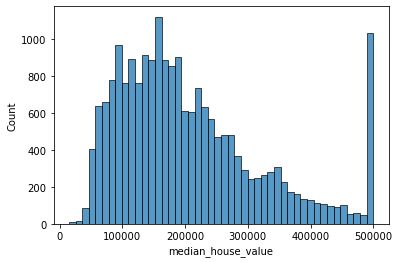

In [290]:
sns.histplot(df.median_house_value)

In [299]:
#least features
#df.corrwith(df.above_average).sort_values(ascending=False)
# top 5 features is [median_income
df_top4 = df[["median_income", "total_rooms", "bedrooms_per_room", "rooms_per_household"]]
df_top4

,median_income,total_rooms,bedrooms_per_room,rooms_per_household
0,8.3252,880.0,0.146591,6.984127
1,8.3014,7099.0,0.155797,6.238137
2,7.2574,1467.0,0.129516,8.288136
3,5.6431,1274.0,0.184458,5.817352
4,3.8462,1627.0,0.172096,6.281853
...,...,...,...,...
20635,1.5603,1665.0,0.224625,5.045455
20636,2.5568,697.0,0.215208,6.114035
20637,1.7000,2254.0,0.215173,5.205543
20638,1.8672,1860.0,0.219892,5.329513


In [296]:
df.corrwith(df.above_average).sort_values(ascending=False)

above_average               1.000000
median_house_value          0.804353
median_income               0.541778
total_rooms                 0.128782
rooms_per_household         0.112104
housing_median_age          0.080069
households                  0.074778
total_bedrooms              0.056209
population                 -0.014898
population_per_household   -0.023354
longitude                  -0.072633
latitude                   -0.098810
bedrooms_per_room          -0.211781
dtype: float64

In [310]:
#### find importances according to model coeffecint 
dict(zip(dv.get_feature_names(), model.coef_[0].round(4)))

#least  least useful feature

{'bedrooms_per_room': 0.1134,
 'households': 0.004,
 'housing_median_age': 0.0357,
 'latitude': 0.1026,
 'longitude': 0.0827,
 'median_income': 1.1964,
 'ocean_proximity=<1H OCEAN': 0.4521,
 'ocean_proximity=INLAND': -1.5985,
 'ocean_proximity=ISLAND': 0.0119,
 'ocean_proximity=NEAR BAY': 0.3092,
 'ocean_proximity=NEAR OCEAN': 0.763,
 'population': -0.0016,
 'population_per_household': 0.0105,
 'rooms_per_household': -0.0137,
 'total_bedrooms': 0.0018,
 'total_rooms': -0.0002}

In [313]:
least = ['population', 'total_bedrooms', 'total_rooms', 'households']

In [304]:
from sklearn.preprocessing import StandardScaler

In [315]:
def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [318]:
dv, model = train(X_train[least], y_train, C=1.0)

In [320]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [326]:
y_pred_least = predict(X_val[least], dv, model)

#### predictions with least feature importance is 76% accuracy

In [327]:
round(roc_auc_score(y_val, y_pred_least), 2)

0.76

In [336]:
X_train_without_least = X_train.loc[:, ~X_train.columns.isin(['population', 'total_bedrooms', 'total_rooms', 'households'])]
X_val_without_least = X_val.loc[:, ~X_val.columns.isin(['population', 'total_bedrooms', 'total_rooms', 'households'])]

#### Lets train the model without these least importance features

In [337]:
dv, model = train(X_train_without_least, y_train, C=1.0)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [338]:
y_pred_without_least = predict(X_val_without_least, dv, model)

#### without least important features we got 92% :)

In [339]:
round(roc_auc_score(y_val, y_pred_without_least), 2)

0.92

In [342]:
w = model.coef_[0]
w.round(3)

array([ 6.443,  0.03 , -1.178, -1.243,  1.194, -0.254, -0.938, -3.151,
       -0.896, -0.397, -0.435,  0.109])

In [343]:
dict(zip(dv.get_feature_names(), w.round(3)))

{'bedrooms_per_room': 6.443,
 'housing_median_age': 0.03,
 'latitude': -1.178,
 'longitude': -1.243,
 'median_income': 1.194,
 'ocean_proximity=<1H OCEAN': -0.254,
 'ocean_proximity=INLAND': -0.938,
 'ocean_proximity=ISLAND': -3.151,
 'ocean_proximity=NEAR BAY': -0.896,
 'ocean_proximity=NEAR OCEAN': -0.397,
 'population_per_household': -0.435,
 'rooms_per_household': 0.109}

### question 6

In [344]:
from sklearn.linear_model import Ridge

In [353]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_room,rooms_per_household,population_per_household,above_average
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127,2.555556,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137,2.109842,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136,2.802260,1
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352,2.547945,1
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853,2.181467,1


In [354]:
# prepare X and y and then split
X_train_full = df.loc[:, ~df.columns.isin(['median_house_value', 'above_average'])]
# apply log power to y values
y_train_full = np.log1p(df.median_house_value.values)

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [358]:
X_train_dict = X_train.to_dict(orient='records')
X_val_dict = X_val.to_dict(orient='records')
X_val_dict[0]

{'latitude': 36.74,
 'longitude': -119.85,
 'housing_median_age': 35.0,
 'total_rooms': 1191.0,
 'total_bedrooms': 190.0,
 'population': 537.0,
 'households': 182.0,
 'median_income': 3.5375,
 'ocean_proximity': 'INLAND',
 'bedrooms_per_room': 0.15952980688497062,
 'rooms_per_household': 6.543956043956044,
 'population_per_household': 2.9505494505494507}

In [359]:
X_train_dv = dv.fit_transform(X_train_dict)
X_val_dv = dv.transform(X_val_dict)

In [361]:
from sklearn.metrics import mean_squared_error

In [366]:
alpha = [0, 0.01, 0.1, 1, 10]
for a in alpha:
    model = Ridge(a, solver="sag", random_state=42)
    model.fit(X_train_dv, y_train)
    y_pred_linear = model.predict(X_val_dv)
    rmse = mean_squared_error(y_val, y_pred_linear, squared=False)
    print("Root mean squared error for alpha(%s): " % a, round(rmse, 3))

Root mean squared error for alpha(0):  0.524
Root mean squared error for alpha(0.01):  0.524
Root mean squared error for alpha(0.1):  0.524
Root mean squared error for alpha(1):  0.524
Root mean squared error for alpha(10):  0.524


In [367]:
#all Alpha's got the same result!